In [1]:
#import Python libraries

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import trim_mean
from scipy.stats import iqr
import weightedstats as ws
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.tri as tri

## Location Estimates of Population and Murder Rates

In [2]:
#downloaw table 1, it is pandas DataFrame now

state = pd.read_csv('state.csv', sep=',')

#set index from 1

state.index = state.index + 1

#display first 8 rows

state.head(8)

,State,Population,Murder.Rate,Abbreviation
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO
7,Connecticut,3574097,2.4,CT
8,Delaware,897934,5.8,DE


In [47]:
#find mean (average) using pandas

state['Population'].mean()  

6162876.3

In [20]:
#find trimmed mean
#trim_mean function comes from scipy.stats library

trimmed_mean = trim_mean(state['Population'].values, 0.1)
print(trimmed_mean)

4783697.125


In [49]:
#find median using pandas

state['Population'].median()  

4436369.5

In [22]:
#find median using numpy

wm_state = np.average(state['Murder.Rate'], weights=table1['Population'])
print('Wheigthed mean of murder rates:', wm_state)

Wheigthed median of murder rates: 4.445833981123393


In [23]:
#weighted_median function comes from weightedstats, you will probably need to install this package

wmd_state = ws.weighted_median(state['Murder.Rate'],weights=table1['Population'])
print('Wheigthed median of murder rates:', wmd_state)

Wheigthed median of murder rates: 4.4


## Variability Estimates of State Population

In [8]:
#find standard deviation using Pandas
state['Population'].std()

6848235.347401142

In [14]:
#find interquartile range
iqr(state['Population']) 

4847308.0

In [24]:
#find the median absolution deviation from the median using statsmodels
robust.mad(state['Population'])

3849876.1459979336

## Percentiles and Boxplots

In [4]:
#generate descriptive statistics using Pandas
state['Murder.Rate'].describe()

count    50.000000
mean      4.066000
std       1.915736
min       0.900000
25%       2.425000
50%       4.000000
75%       5.550000
max      10.300000
Name: Murder.Rate, dtype: float64

In [12]:
#find percentiles using Pandas
state['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

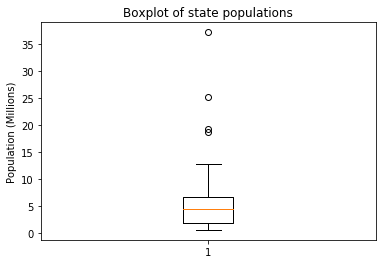

In [7]:
#build a boxplot using matplotlib library

#plot the boxplot
#devide by million to display count in millions on y-axis
plt.boxplot(state['Population']/1000000)

#add descriptions
plt.title('Boxplot of state populations')
plt.ylabel('Population (Millions)')

plt.show()

In [69]:
#create a simple frequency table with Pandas

state['Population'].value_counts(bins=10)

(526935.669, 4232659.0]     24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [113]:
#create a simple frequency table using Pandas with abbreviation displayed
state['Population bins'] = pd.cut(x=state['Population'], bins=10)
state.groupby('Population bins')['Abbreviation'].apply(','.join)

Population bins
(526935.67, 4232659.0]      AK,AR,CT,DE,HI,ID,IA,KS,ME,MS,MT,NE,NV,NH,NM,N...
(4232659.0, 7901692.0]              AL,AZ,CO,IN,KY,LA,MD,MA,MN,MO,SC,TN,WA,WI
(7901692.0, 11570725.0]                                     GA,MI,NJ,NC,OH,VA
(11570725.0, 15239758.0]                                                IL,PA
(15239758.0, 18908791.0]                                                   FL
(18908791.0, 22577824.0]                                                   NY
(22577824.0, 26246857.0]                                                   TX
(26246857.0, 29915890.0]                                                     
(29915890.0, 33584923.0]                                                     
(33584923.0, 37253956.0]                                                   CA
Name: Abbreviation, dtype: object

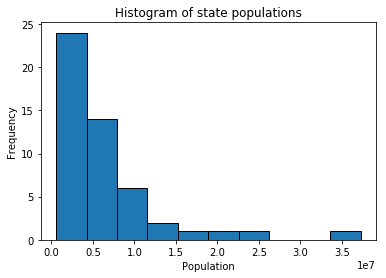

In [8]:
#build a histogram using matplotlib library

#plot a histogram
plt.hist(state['Population'], edgecolor='black') 

#add descriptions
plt.title('Histogram of state populations')
plt.ylabel('Frequency')
plt.xlabel('Population')

plt.show()

Text(0.5, 0, 'Murder Rare (per 100,000)')

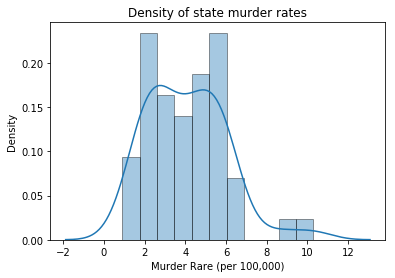

In [11]:
#plot density plot and histogram using seaborn

sns.distplot(state['Murder.Rate'], bins=11, hist=True, hist_kws={'edgecolor':'black'})

#add descriptions
plt.title('Density of state murder rates')
plt.ylabel('Density')
plt.xlabel('Murder Rare (per 100,000)')

## Exploring Binary and Categorical Data

In [13]:
#download the data

dfw_airline = pd.read_csv('dfw_airline.csv', sep=',')

#display the dataframe

dfw_airline 

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


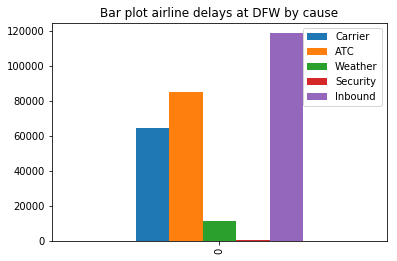

In [16]:
#plotting a bar chart using pandas
dfw_airline.plot.bar(title='Bar plot airline delays at DFW by cause')

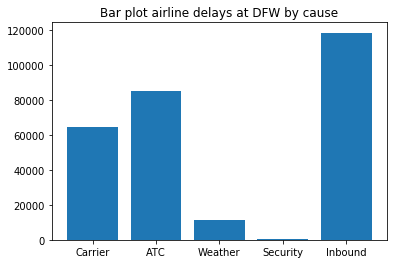

In [17]:
#plotting a bar chart using matpotlib
plt.bar(dfw_airline.columns,dfw_airline.iloc[0])

#add descriptions
plt.title('Bar plot airline delays at DFW by cause')

plt.show()

## Correlation

In [19]:
#download the data

sp500 = pd.read_csv('sp500_data.csv')
sectors = pd.read_csv('sp500_sectors.csv')

In [98]:
sp500.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [103]:
#correlation coefficient for all dates
sp500.loc[:,['T','CTL','FTR','VZ','LVLT']].corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.405853,0.283279,0.617035,0.061545
CTL,0.405853,1.000000,0.377644,0.385752,0.054534
FTR,0.283279,0.377644,1.000000,0.289295,0.067313
VZ,0.617035,0.385752,0.289295,1.000000,0.045919
LVLT,0.061545,0.054534,0.067313,0.045919,1.000000


In [127]:
#find index of 30th June 2015
sp500.loc[sp500['Unnamed: 0'] == '2015-06-30']

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
5645,2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.2,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [131]:
#find index of 2th July 2012 (there is no 1th in the dataframe)
sp500.loc[sp500['Unnamed: 0'] == '2012-07-02']

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
4893,2012-07-02,1.190002,-0.224999,-0.055103,-0.560002,-0.455,-0.104774,-0.279545,-0.495967,-0.018692,...,-0.970001,3.830002,1.257135,0.0,2.110001,0.105,0.219207,5.61,-0.539997,-0.189994


In [129]:
#correlation coefficient from July 2012 through June 2015
sp500.loc[4893:5645,['T','CTL','FTR','VZ','LVLT']].corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474723,0.327797,0.678086,0.278652
CTL,0.474723,1.000000,0.420062,0.416554,0.286614
FTR,0.327797,0.420062,1.000000,0.288349,0.260303
VZ,0.678086,0.416554,0.288349,1.000000,0.242077
LVLT,0.278652,0.286614,0.260303,0.242077,1.000000


In [137]:
#the same correlation using conditional selection
sp500.loc[(sp500['Unnamed: 0'] > '2012-07-01') & (sp500['Unnamed: 0'] <= '2015-06-30'),['T','CTL','FTR','VZ','LVLT']].corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474723,0.327797,0.678086,0.278652
CTL,0.474723,1.000000,0.420062,0.416554,0.286614
FTR,0.327797,0.420062,1.000000,0.288349,0.260303
VZ,0.678086,0.416554,0.288349,1.000000,0.242077
LVLT,0.278652,0.286614,0.260303,0.242077,1.000000


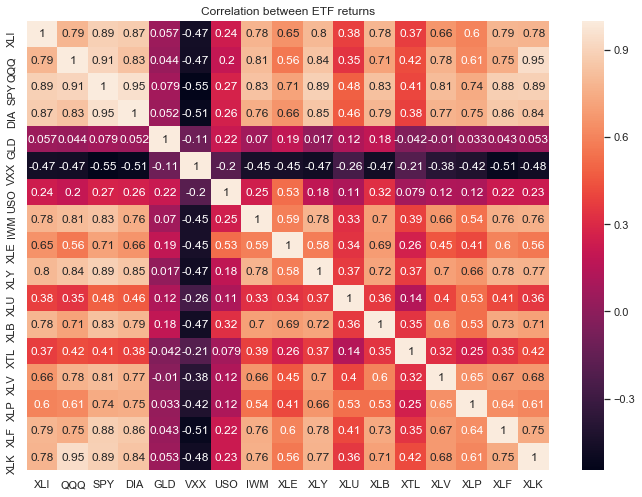

In [21]:
# choose only defensive ETFs

s_etf = sectors.loc[sectors['sector'] == 'etf', ['symbol']]
correlation_matrix = sp500.loc[sp500['Unnamed: 0'] > '2012-07-01', s_etf['symbol'].values].corr()

# build heatmap using seaborn library

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

plt.title('Correlation between ETF returns')
plt.show()

There is a way to plot a correlation matrix as a set of ellipses in Python, here is an explanationhttps://stackoverflow.com/questions/34556180/how-can-i-plot-a-correlation-matrix-as-a-set-of-ellipses-similar-to-the-r-open

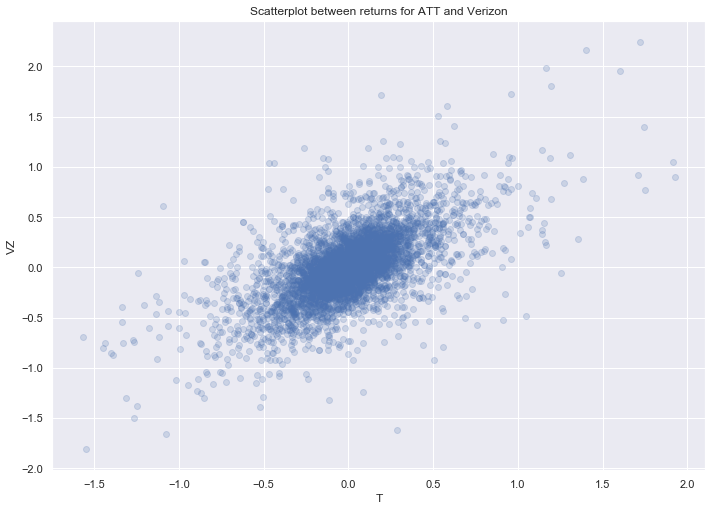

In [22]:
#plot a scatter plot between returns for ATT and Verizon

plt.scatter(sp500['T'],sp500['VZ'],alpha=0.2)

#add descriptions
plt.title('Scatterplot between returns for ATT and Verizon')
plt.ylabel('VZ')
plt.xlabel('T')
plt.show()

## Exploring Two or More Variables

In [24]:
#download the data 
kc_tax = pd.read_csv('kc_tax.csv')
kc_tax.describe()

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,4.975110e+05,498249.000000,4.679000e+05
mean,4.737959e+05,2057.651714,9.830935e+04
std,5.380832e+05,938.705293,1.440555e+05
min,1.000000e+03,0.000000,0.000000e+00
25%,2.690000e+05,1410.000000,9.803200e+04
50%,3.840000e+05,1900.000000,9.807000e+04
75%,5.490000e+05,2520.000000,9.811800e+04
max,1.235360e+08,48160.000000,9.815706e+07


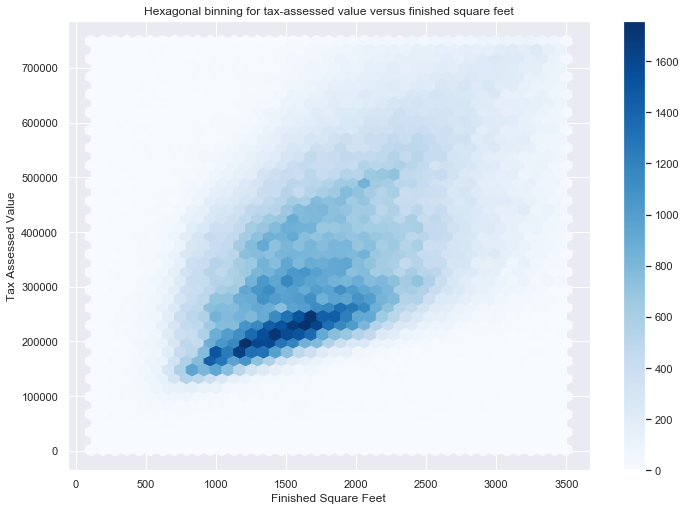

In [26]:
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) & (kc_tax['SqFtTotLiving'] > 100) & (kc_tax['SqFtTotLiving'] < 3500)]

plt.hexbin(kc_tax0['SqFtTotLiving'], kc_tax0['TaxAssessedValue'], cmap='Blues', gridsize=40)
plt.colorbar()


#add descriptions
plt.title('Hexagonal binning for tax-assessed value versus finished square feet')
plt.ylabel('Tax Assessed Value')
plt.xlabel('Finished Square Feet')
plt.show()

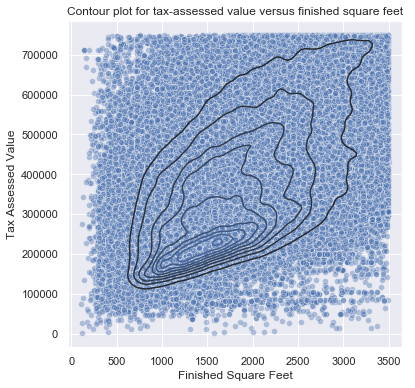

In [36]:
#to plot two plots in one figure use plt.sublots

f, ax = plt.subplots(figsize=(6, 6))

#first plot a scatterplot

sns.scatterplot(kc_tax0['SqFtTotLiving'], kc_tax0['TaxAssessedValue'], ax=ax, alpha=0.4)

#then countour plot,  c="b"

sns.kdeplot(kc_tax0['SqFtTotLiving'], kc_tax0['TaxAssessedValue'], shade=False, shade_lowest=False, ax=ax)

plt.title('Contour plot for tax-assessed value versus finished square feet')
plt.ylabel('Tax Assessed Value')
plt.xlabel('Finished Square Feet')
plt.show()

### Two Categorical Veriables

In [105]:
#donwload the data
lc_loans = pd.read_csv('lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [35]:
#create a contingency tables
cont_table = pd.crosstab(lc_loans['grade'], lc_loans['status'], margins=True, margins_name='Total')
print(cont_table)

status  Charged Off  Current  Fully Paid  Late   Total
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
Total         22671   321185       97316  9789  450961


In [37]:
cont_table = pd.crosstab(lc_loans['grade'], lc_loans['status'], margins=True, margins_name='Total', normalize='index')
print(cont_table)

status  Charged Off   Current  Fully Paid      Late
grade                                              
A          0.021548  0.690454    0.281528  0.006470
B          0.040054  0.709013    0.235401  0.015532
C          0.049828  0.735702    0.191495  0.022974
D          0.067410  0.717328    0.184189  0.031073
E          0.081657  0.707936    0.170929  0.039478
F          0.118258  0.654371    0.180409  0.046962
G          0.126196  0.614008    0.198396  0.061401
Total      0.050273  0.712223    0.215797  0.021707


In [38]:
cont_table = pd.crosstab(lc_loans['grade'], lc_loans['status'], margins=True, margins_name='Total', normalize='columns')
print(cont_table)

status  Charged Off   Current  Fully Paid      Late     Total
grade                                                        
A          0.068899  0.155832    0.209709  0.047911  0.160746
B          0.233867  0.292205    0.320194  0.210032  0.293529
C          0.265670  0.276875    0.237854  0.283686  0.268039
D          0.220855  0.165889    0.140583  0.235775  0.164708
E          0.125358  0.076713    0.061131  0.140362  0.077177
F          0.067311  0.026290    0.023922  0.061906  0.028614
G          0.018041  0.006196    0.006607  0.020329  0.007187


### Categorical and Numeric Data

In [28]:
#donwload the data
airline_stats = pd.read_csv('airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


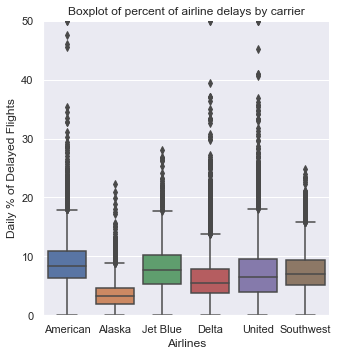

In [29]:
sns.catplot(x="airline", y="pct_carrier_delay", kind="box", data=airline_stats)

plt.ylim(0, 50)
plt.title('Boxplot of percent of airline delays by carrier')
plt.ylabel('Daily % of Delayed Flights')
plt.xlabel('Airlines')
plt.show()

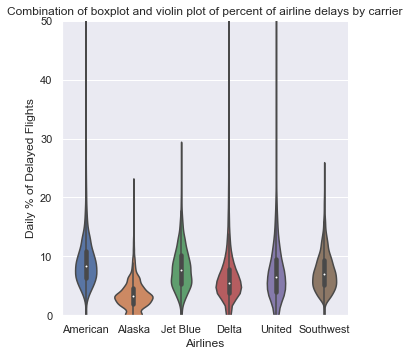

In [30]:
#plot a violin plot
sns.catplot(x="airline", y="pct_carrier_delay", kind="violin", data=airline_stats)
plt.ylim(0, 50)

plt.title('Combination of boxplot and violin plot of percent of airline delays by carrier')
plt.ylabel('Daily % of Delayed Flights')
plt.xlabel('Airlines')
plt.show()

### Visualising Multiple Variables 

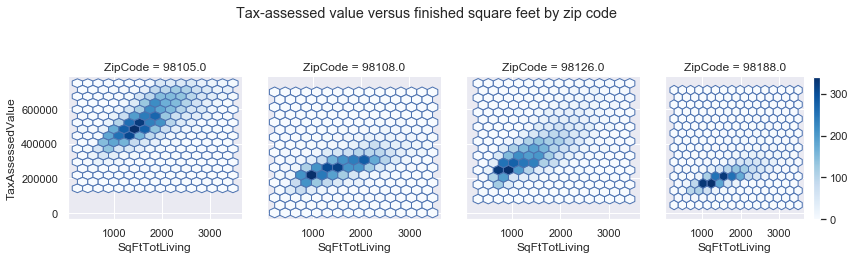

In [34]:
g = sns.FacetGrid(kc_tax0.loc[kc_tax0['ZipCode'].isin([98188, 98105, 98108, 98126])], col='ZipCode')
g.map(plt.hexbin, 'SqFtTotLiving', 'TaxAssessedValue', cmap='Blues', gridsize=15)
plt.colorbar()

#add main title, y used for positioning title above subplots
plt.suptitle('Tax-assessed value versus finished square feet by zip code',y=1.2)

plt.show()